In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro
from sklearn.utils import resample

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

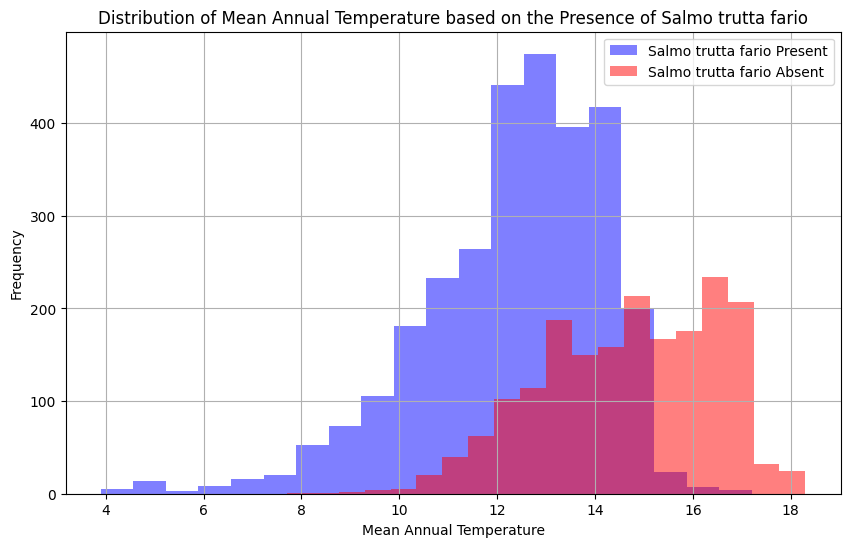

In [3]:
# Task 1: Visualizing the effect of Mean Annual Temperature on the presence of Salmo trutta fario

# Filter data for Salmo trutta fario presence and absence
brown_trout_present = df[df['Salmo trutta fario'] > 0]
brown_trout_absent = df[df['Salmo trutta fario'] == 0]

# Create histograms for presence and absence of Salmo trutta fario
plt.figure(figsize=(10, 6))
plt.hist(brown_trout_present['temp_ann'], bins=20, alpha=0.5, color='blue', label='Salmo trutta fario Present')
plt.hist(brown_trout_absent['temp_ann'], bins=20, alpha=0.5, color='red', label='Salmo trutta fario Absent')
plt.xlabel('Mean Annual Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Annual Temperature based on the Presence of Salmo trutta fario')
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Density')

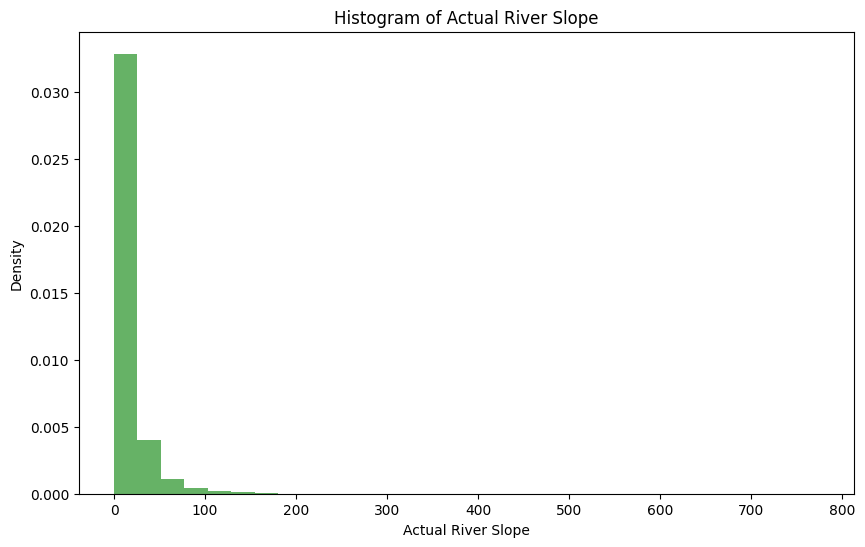

In [4]:
# Task 2: Testing if the actual_river_slope is drawn from a normal distribution (visualization method)
actual_river_slope = df['Actual_river_slope']
actual_river_slope = actual_river_slope.dropna()
plt.figure(figsize=(10, 6))
plt.hist(actual_river_slope, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Actual River Slope')
plt.xlabel('Actual River Slope')
plt.ylabel('Density')

In [8]:
# Task 2: Testing if the actual_river_slope is drawn from a normal distribution (hypothesis testing method)
# Shapiro-Wilk test for normality on sample means
shapiro_test_statistic, shapiro_p_value = shapiro(sample_means)
print("Shapiro-Wilk Test Statistic for Sample Means:", shapiro_test_statistic)
print("p-value for Sample Means:", shapiro_p_value)
plt.show()

Shapiro-Wilk Test Statistic for Sample Means: 0.9883764982223511
p-value for Sample Means: 0.5363712310791016


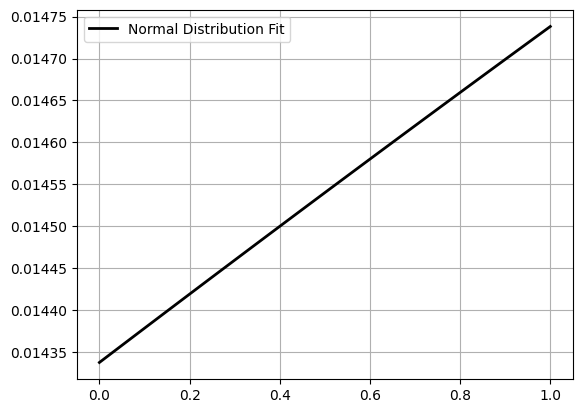

In [5]:
# Fit a normal distribution to the data
mu, std = norm.fit(actual_river_slope)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.legend(['Normal Distribution Fit', 'Actual River Slope'])
plt.grid(True)
plt.show()

Text(0, 0.5, 'Density')

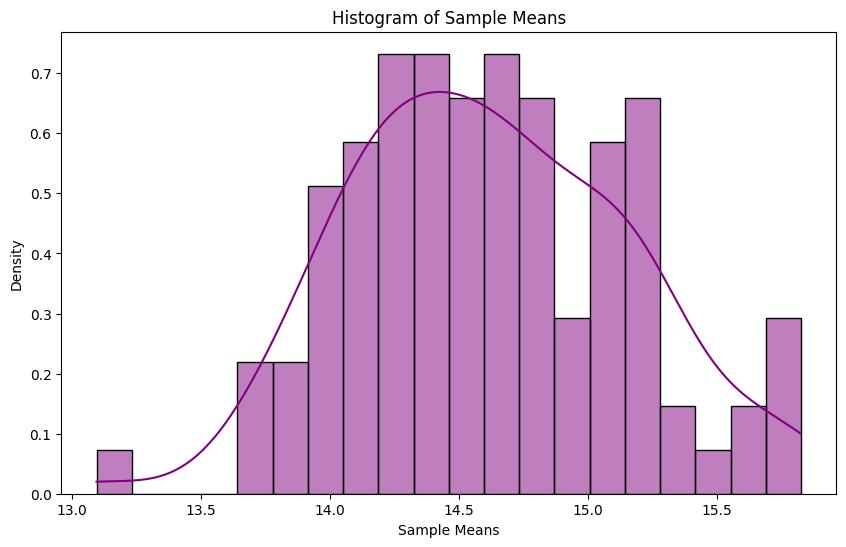

In [6]:
# Task 3: Sampling and testing the mean values for normal distribution
sample_means = []
for _ in range(100):
    sample = resample(actual_river_slope, n_samples=2000, replace=True)
    sample_means.append(np.mean(sample))
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=20, color='purple', kde=True, stat='density')
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Means')
plt.ylabel('Density')